In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pd.options.display.max_colwidth = 200

# Load test result

In [2]:
df = pd.read_csv('data/model_compare2.csv')

In [3]:
print(df.columns)
display(df.sample(2))

Index(['org_title', 'lower_title', 'cleaned_words', 'cleaned_pos',
       'minimal_words', 'y_true', 'nb_og', 'nb_og_p0', 'nb_og_p1', 'nb_lo',
       'nb_lo_p0', 'nb_lo_p1', 'nb_cw', 'nb_cw_p0', 'nb_cw_p1', 'nb_ps',
       'nb_ps_p0', 'nb_ps_p1', 'nb_mw', 'nb_mw_p0', 'nb_mw_p1', 'fnn_og',
       'fnn_og_p0', 'fnn_og_p1', 'fnn_lo', 'fnn_lo_p0', 'fnn_lo_p1', 'fnn_cw',
       'fnn_cw_p0', 'fnn_cw_p1', 'fnn_ps', 'fnn_ps_p0', 'fnn_ps_p1', 'fnn_mw',
       'fnn_mw_p0', 'fnn_mw_p1', 'lstm_og', 'lstm_og_p0', 'lstm_og_p1',
       'lstm_lo', 'lstm_lo_p0', 'lstm_lo_p1', 'lstm_cw', 'lstm_cw_p0',
       'lstm_cw_p1', 'lstm_ps', 'lstm_ps_p0', 'lstm_ps_p1', 'lstm_mw',
       'lstm_mw_p0', 'lstm_mw_p1', 'too_long', 'noisy', 'clickbait', 'slang',
       'donald', 'obama', 'hillary', 'bernie'],
      dtype='object')


,org_title,lower_title,cleaned_words,cleaned_pos,minimal_words,y_true,nb_og,nb_og_p0,nb_og_p1,nb_lo,...,lstm_mw_p0,lstm_mw_p1,too_long,noisy,clickbait,slang,donald,obama,hillary,bernie
7274,Republican Fox Strategist Files A $4 Million Lawsuit Against Donald Trump,republican fox strategist files a $4 million lawsuit against donald trump,republican fox strategist files a 4 million lawsuit against donald trump,JJ NNP NNP NNP NNP CD NNP NNP NNP NNP NNP,republican fox strategist file million lawsuit donald trump,1,1,0.009616,0.990384,1,...,0.019187,0.980813,0,0,0,0,1,0,0,0
6689,"Texas Church Rejects Man For Being Gay, But He Gets The Last Laugh A Year Later","texas church rejects man for being gay, but he gets the last laugh a year later",texas church rejects man for being gay but he gets the last laugh a year later,NNP NNP NNP NNP IN NNP NNP CC PRP VBZ DT JJ NNP NNP NN RB,texas church reject man gay get last laugh year later,1,1,0.000009,0.999991,1,...,0.000019,0.999981,0,0,0,0,0,0,0,0


In [4]:
seq_type = ['Original','Lower','CleanedWords','PoS','MinimalWords']
ml_type = ['NaiveBayes','FNN','LSTM']
seq_type_abb = ['og','lo','cw','ps','mw']
ml_type_abb = ['nb','fnn','lstm']
cut_name = ['too_long','noisy','clickbait','slang','donald', 'obama', 'hillary', 'bernie']
x_name = df.columns[:len(seq_type)]


X = []
for i in range(len(seq_type)):
    X.append(df[x_name[i]].to_numpy())

y_true = df.y_true.to_numpy()

# name of all models
y_name = []
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        y_name.append(ml_type_abb[i]+'_'+seq_type_abb[j])
        
for i in range(len(cut_name)):
    y_name.append(cut_name[i])

# prediction
y_pred = []
for i in range(len(y_name)):
    y_pred.append(df[y_name[i]].to_numpy())

# probability
fake_prob = []
for i in range(len(ml_type)*len(seq_type)):
    fake_prob.append(df[y_name[i]+'_p1'].to_numpy())

# Score summary

In [5]:
df_entries = []


for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        ac = accuracy_score(y_true, y_pred[k])
        pr = precision_score(y_true, y_pred[k])
        re = recall_score(y_true, y_pred[k])
        f1 = f1_score(y_true, y_pred[k])
        df_entries.append([ml_type[i],seq_type[j],ac,pr,re,f1])
        
df_summary = pd.DataFrame(df_entries, columns = ['model','input','accuracy','precision','recall','f1score'])        
        

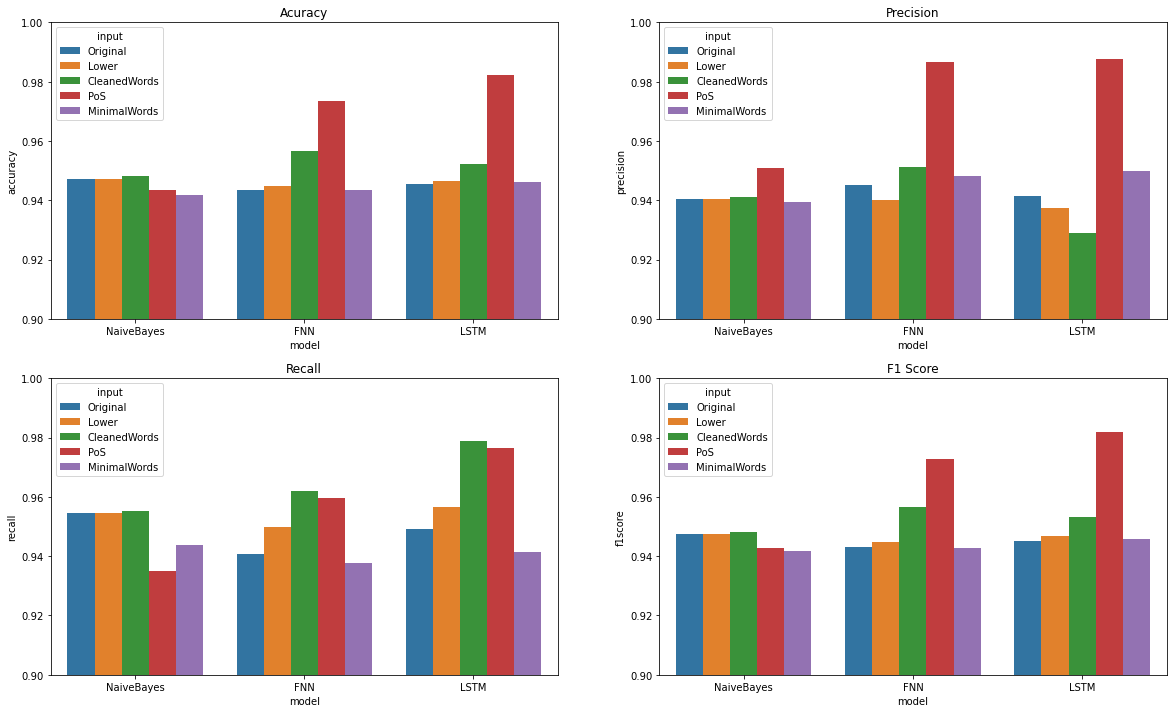

In [6]:
plt.rcParams["figure.figsize"] = (20,12)

fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])

ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])

ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])

ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])

plt.show()

### Findings
- **LSTM with PoS (part of speech)** tagging input showed the **best performance**.
- Naive bayes showed less dependency on input data, wheras both **FNN and LSTM** showed **much batter performance with PoS tags**. It tells **grammar structure is the strongest feature of classification** in this dataset.
- **Manual text cleaning ("CleanedWords") improved** performance, however, **lemmatization and stopword removal ("MinimalWords") didn't improve** performance.
- Unlike my naive expectation, (Minimal Words) showed worst performance. It tells **including noise of text improves fake news classification**.

# Right/Wrong classification examples

In [7]:
df_r = []
df_w = []

for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        #y_name = ml_type_abb[i]+'_'+seq_type_abb[j]
        
        r = df[df.y_true==df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        w = df[df.y_true!=df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        
        r['gap'] = abs(r[y_name[k]+'_p1']-r.y_true)
        w['gap'] = abs(w[y_name[k]+'_p1']-w.y_true)
        
        r.sort_values(by=['gap'],axis=0,inplace=True)
        w.sort_values(by=['gap'],axis=0,inplace=True)
        
        df_r.append(r)
        df_w.append(w)        

In [8]:
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        title = ml_type[i],seq_type[j]
        
        print(title,' Right, confident')
        display(df_r[k].iloc[:10])
        
        print(title,' Right, subtle')
        display(df_r[k].iloc[-10:])
        
        print(title,' Wrong, subtle')
        display(df_w[k].iloc[:10])        
        
        
        print(title,' Wrong, confident')
        display(df_w[k].iloc[-10:])
        

        

('NaiveBayes', 'Original')  Right, confident


,org_title,y_true,nb_og_p1,gap
4722,"BOOM! Mother Of Black Son Murdered By Blacks: “I Don’t Preach Black Lives Matter, Because Black Lives Only Matters When Law Enforcement Is Involved” [VIDEO]",1,1.0,0.0
4920,DESTROYED IN 10 SECONDS: Tucker Carlson EXPOSES Hypocrisy Of Liberal “MASH” Actor Who’s Asking Electors To BLOCK Trump From Becoming President [VIDEO],1,1.0,0.0
6905,BREAKING! Wikileaks’ Julian Assange Explains Why “Trump Won’t Be Permitted To Win” And Proof That ISIS Was Bankrolled By People Who Gave Money To Clintons [VIDEO],1,1.0,0.0
703,SHOCKING VIDEO: Muslim Child Bride Forced to Wed Man 20 Years Older…You won’t believe what he trades for her! [Video],1,1.0,0.0
2651,"“THANK YOU BABY”…YES, FEMINISTS WILL GO NUTS: President Trump Uses Endearment To Refer to Kellyanne Conway In Thank You Speech [Video]",1,1.0,0.0
6903,CREEPY BERNIE Calls For Trump To Step Down…What About Disgusting Essay BERNIE SANDERS WROTE About Women Fantasizing About Being Gang Raped or Men Fantasizing About Sexually Abusing Women?,1,1.0,0.0
4928,Alec Baldwin Beat Sean Spicer Over The Head With Sean Hannity AND Gave Us Hope In One Epic Tweetstorm (TWEETS),1,1.0,0.0
3528,"WHOA! RAND PAUL, NEWT GINGRICH RIP OBAMA’S National Security Advisor, Benghazi Video Liar, Susan Rice For ABRUPTLY Backing Out Of House Testimony [VIDEO]",1,1.0,0.0
4655,HILLARY’S ANTI-TRUMP MUSLIM DAD Claims Terror Has “Nothing To Do With Islam”…Tries To Convince Americans Trump’s Desire To Protect Us From Terror Is Somehow Evil [VIDEO],1,1.0,0.0
5665,“BLOOD ON THEIR HANDS” FOR VOTING RIGHTS: The Truth About Shocking Number Of Murders By Illegal Aliens In US Hidden By Media And Dems [VIDEO],1,1.0,0.0


('NaiveBayes', 'Original')  Right, subtle


,org_title,y_true,nb_og_p1,gap
2576,"Bush takes veiled swipe at Trump, defends immigration and trade",0,0.483313,0.483313
3987,Trump says pope will wish he was president if Vatican is attacked by Islamic State,0,0.484965,0.484965
54,Ten million Australians vote so far in same-sex marriage poll,0,0.485502,0.485502
3049,NEW YORK TIMES Publishes Trump Tax Return From 20 Years Ago…TRUMP FIRES BACK!,1,0.513987,0.486013
7515,U.S. House Democratic leader Pelosi calls for Confederate statue removal,0,0.486284,0.486284
3428,U.S. justices weigh federal fraud claim over woman's death,0,0.487395,0.487395
6916,"Bentley, former Congresswoman from Maryland, dies at 92",0,0.488759,0.488759
6749,"Congresswoman quits Democratic National Committee, endorses Bernie Sanders",0,0.490553,0.490553
4344,"Experience vs. Judgment: Clinton, Sanders vie for pivotal Iowa vote",0,0.491046,0.491046
4526,Senate Dems To Introduce Constitutional Amendment Overturning Citizens United,1,0.500212,0.499788


('NaiveBayes', 'Original')  Wrong, subtle


,org_title,y_true,nb_og_p1,gap
4628,Republican Marco Rubio winning Wall Street fundraising race,0,0.500280,0.500280
5850,"Before debate, protesters build 'wall of taco trucks' outside Trump hotel",0,0.503164,0.503164
3508,Five Things To Look Out For With Trump’s Pentagon,1,0.495740,0.504260
1915,Syria: US Peace Council Addresses United Nations in NYC,1,0.494233,0.505767
753,Trump revealed intelligence secrets to Russians in Oval Office: officials,0,0.508404,0.508404
2510,Sanders Campaign Fights Back After Ohio Bans Youth From Primaries,1,0.489521,0.510479
3324,What ‘States Rights?’ – Ted Cruz Calls For Federal Law To Crush ALL Labor Unions Nationwide,1,0.488009,0.511991
5088,U.S. House speaker asks that Clinton be denied classified data,0,0.513929,0.513929
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.514596,0.514596
2988,POPE MAKES VISIT TO NUNS OBAMA REGIME IS SUING For Not Conforming To Obamacare Contraception Mandate,1,0.482588,0.517412


('NaiveBayes', 'Original')  Wrong, confident


,org_title,y_true,nb_og_p1,gap
4651,Crowd controversy: The making of an Inauguration Day photo,0,9.999489e-01,0.999949
6828,NORTH KOREA: Trump’s Recklessness Could Trigger All-Out Conflict on Korean Peninsula,1,3.724350e-05,0.999963
7753,COME TO ITALY AS A REFUGEE And Work For FREE…Italy’s Interior Minister Fed Up With Financial Burden On Citizens,1,2.167907e-05,0.999978
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,9.999864e-01,0.999986
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,8.608787e-06,0.999991
6959,"Trump tweets mock video of himself tackling, punching CNN logo",0,9.999967e-01,0.999997
4484,Chinese Media Warns of ‘War’ with US Following Tillerson’s Remarks South China Sea,1,2.315111e-06,0.999998
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,8.848982e-07,0.999999
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,1.457632e-08,1.000000
7802,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,1.457632e-08,1.000000


('NaiveBayes', 'Lower')  Right, confident


,org_title,y_true,nb_lo_p1,gap
4722,"BOOM! Mother Of Black Son Murdered By Blacks: “I Don’t Preach Black Lives Matter, Because Black Lives Only Matters When Law Enforcement Is Involved” [VIDEO]",1,1.0,0.0
4920,DESTROYED IN 10 SECONDS: Tucker Carlson EXPOSES Hypocrisy Of Liberal “MASH” Actor Who’s Asking Electors To BLOCK Trump From Becoming President [VIDEO],1,1.0,0.0
6905,BREAKING! Wikileaks’ Julian Assange Explains Why “Trump Won’t Be Permitted To Win” And Proof That ISIS Was Bankrolled By People Who Gave Money To Clintons [VIDEO],1,1.0,0.0
703,SHOCKING VIDEO: Muslim Child Bride Forced to Wed Man 20 Years Older…You won’t believe what he trades for her! [Video],1,1.0,0.0
2651,"“THANK YOU BABY”…YES, FEMINISTS WILL GO NUTS: President Trump Uses Endearment To Refer to Kellyanne Conway In Thank You Speech [Video]",1,1.0,0.0
6903,CREEPY BERNIE Calls For Trump To Step Down…What About Disgusting Essay BERNIE SANDERS WROTE About Women Fantasizing About Being Gang Raped or Men Fantasizing About Sexually Abusing Women?,1,1.0,0.0
4928,Alec Baldwin Beat Sean Spicer Over The Head With Sean Hannity AND Gave Us Hope In One Epic Tweetstorm (TWEETS),1,1.0,0.0
3528,"WHOA! RAND PAUL, NEWT GINGRICH RIP OBAMA’S National Security Advisor, Benghazi Video Liar, Susan Rice For ABRUPTLY Backing Out Of House Testimony [VIDEO]",1,1.0,0.0
4655,HILLARY’S ANTI-TRUMP MUSLIM DAD Claims Terror Has “Nothing To Do With Islam”…Tries To Convince Americans Trump’s Desire To Protect Us From Terror Is Somehow Evil [VIDEO],1,1.0,0.0
5665,“BLOOD ON THEIR HANDS” FOR VOTING RIGHTS: The Truth About Shocking Number Of Murders By Illegal Aliens In US Hidden By Media And Dems [VIDEO],1,1.0,0.0


('NaiveBayes', 'Lower')  Right, subtle


,org_title,y_true,nb_lo_p1,gap
2576,"Bush takes veiled swipe at Trump, defends immigration and trade",0,0.483313,0.483313
3987,Trump says pope will wish he was president if Vatican is attacked by Islamic State,0,0.484965,0.484965
54,Ten million Australians vote so far in same-sex marriage poll,0,0.485502,0.485502
3049,NEW YORK TIMES Publishes Trump Tax Return From 20 Years Ago…TRUMP FIRES BACK!,1,0.513987,0.486013
7515,U.S. House Democratic leader Pelosi calls for Confederate statue removal,0,0.486284,0.486284
3428,U.S. justices weigh federal fraud claim over woman's death,0,0.487395,0.487395
6916,"Bentley, former Congresswoman from Maryland, dies at 92",0,0.488759,0.488759
6749,"Congresswoman quits Democratic National Committee, endorses Bernie Sanders",0,0.490553,0.490553
4344,"Experience vs. Judgment: Clinton, Sanders vie for pivotal Iowa vote",0,0.491046,0.491046
4526,Senate Dems To Introduce Constitutional Amendment Overturning Citizens United,1,0.500212,0.499788


('NaiveBayes', 'Lower')  Wrong, subtle


,org_title,y_true,nb_lo_p1,gap
4628,Republican Marco Rubio winning Wall Street fundraising race,0,0.500280,0.500280
5850,"Before debate, protesters build 'wall of taco trucks' outside Trump hotel",0,0.503164,0.503164
3508,Five Things To Look Out For With Trump’s Pentagon,1,0.495740,0.504260
1915,Syria: US Peace Council Addresses United Nations in NYC,1,0.494233,0.505767
753,Trump revealed intelligence secrets to Russians in Oval Office: officials,0,0.508404,0.508404
2510,Sanders Campaign Fights Back After Ohio Bans Youth From Primaries,1,0.489521,0.510479
3324,What ‘States Rights?’ – Ted Cruz Calls For Federal Law To Crush ALL Labor Unions Nationwide,1,0.488009,0.511991
5088,U.S. House speaker asks that Clinton be denied classified data,0,0.513929,0.513929
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.514596,0.514596
2988,POPE MAKES VISIT TO NUNS OBAMA REGIME IS SUING For Not Conforming To Obamacare Contraception Mandate,1,0.482588,0.517412


('NaiveBayes', 'Lower')  Wrong, confident


,org_title,y_true,nb_lo_p1,gap
4651,Crowd controversy: The making of an Inauguration Day photo,0,9.999489e-01,0.999949
6828,NORTH KOREA: Trump’s Recklessness Could Trigger All-Out Conflict on Korean Peninsula,1,3.724350e-05,0.999963
7753,COME TO ITALY AS A REFUGEE And Work For FREE…Italy’s Interior Minister Fed Up With Financial Burden On Citizens,1,2.167907e-05,0.999978
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,9.999864e-01,0.999986
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,8.608787e-06,0.999991
6959,"Trump tweets mock video of himself tackling, punching CNN logo",0,9.999967e-01,0.999997
4484,Chinese Media Warns of ‘War’ with US Following Tillerson’s Remarks South China Sea,1,2.315111e-06,0.999998
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,8.848982e-07,0.999999
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,1.457632e-08,1.000000
7802,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,1.457632e-08,1.000000


('NaiveBayes', 'CleanedWords')  Right, confident


,org_title,y_true,nb_cw_p1,gap
5076,OOPS! SHEILA JACKSON LEE Called The Woman She Kicked Out of First Class A Racist…Too Bad She Didn’t Know This ONE IMPORTANT Thing About The Passenger,1,1.0,0.0
3745,EPIC! BLACK CONSERVATIVE Calls Out CNN Anchor On Trash Talking Trump: “You sit here and attack the President!” [Video],1,1.0,0.0
5354,"HILLARY PANDERS TO DOMESTIC TERRORISTS: Woman Whose Husband Demanded Rioters “Burn Down” Ferguson, Beat Up And Robbed Her Mother-In-Law, Will Speak At DNC [VIDEO]",1,1.0,0.0
2684,[VIDEO] ‘TRUMPS GIRLS’ HAMMER MSNBC AFTER BEING UNINVITED TO APPEAR ON SHOW: “How Is It They Can Invite Brian Lyin’ Williams Back On MSNBC But Don’t Want To Invite Us”,1,1.0,0.0
5334,WATCH: TREY GOWDY FURIOUS OVER LAWLESS Loretta Lynch During Clinton Email Hearing: “It was a total WASTE of time…The facts are embarrassing for her presidential candidate [Hillary]”,1,1.0,0.0
964,DISNEY OWNED ABC SHOW “Scandal” Shows Actress Having Abortion While “Silent Night” Plays And Narrator Says: “Family doesn’t complete you…it destroys you” [VIDEO] UPDATE: ‘Scandal’ Producer Sits On...,1,1.0,0.0
1883,BREAKING: CNN PRODUCER Caught On Undercover Video Trashing Trump: “Voters “Stupid as Sh*t” [Video],1,1.0,0.0
2757,TUCKER AND GUTFELD’S Hilarious Take On Miley Cyrus Crying Over ‘Thank You Hillary’ Note: ‘They shouldn’t be treating her like Mrs. Claus’ [Video],1,1.0,0.0
3711,"WRONG COLOR: If Left Really Cared About Police Brutality, They’d Be Protesting Death Of White 6 Yr Old Autistic Boy Whose Dad Was Unarmed With “Hands Up” [VIDEO]",1,1.0,0.0
6432,CHRIS WALLACE CALLS OUT JILL STEIN: ‘Where do you get off saying the American people need a recount?’ [Video],1,1.0,0.0


('NaiveBayes', 'CleanedWords')  Right, subtle


,org_title,y_true,nb_cw_p1,gap
3987,Trump says pope will wish he was president if Vatican is attacked by Islamic State,0,0.485883,0.485883
1847,California lawmakers hire Holder for fights with Trump,0,0.485934,0.485934
4628,Republican Marco Rubio winning Wall Street fundraising race,0,0.488242,0.488242
54,Ten million Australians vote so far in same-sex marriage poll,0,0.489435,0.489435
7515,U.S. House Democratic leader Pelosi calls for Confederate statue removal,0,0.491287,0.491287
3428,U.S. justices weigh federal fraud claim over woman's death,0,0.491843,0.491843
4526,Senate Dems To Introduce Constitutional Amendment Overturning Citizens United,1,0.505218,0.494782
6749,"Congresswoman quits Democratic National Committee, endorses Bernie Sanders",0,0.495002,0.495002
4344,"Experience vs. Judgment: Clinton, Sanders vie for pivotal Iowa vote",0,0.496607,0.496607
3508,Five Things To Look Out For With Trump’s Pentagon,1,0.500746,0.499254


('NaiveBayes', 'CleanedWords')  Wrong, subtle


,org_title,y_true,nb_cw_p1,gap
2576,"Bush takes veiled swipe at Trump, defends immigration and trade",0,0.501310,0.501310
3324,What ‘States Rights?’ – Ted Cruz Calls For Federal Law To Crush ALL Labor Unions Nationwide,1,0.496351,0.503649
5850,"Before debate, protesters build 'wall of taco trucks' outside Trump hotel",0,0.509140,0.509140
753,Trump revealed intelligence secrets to Russians in Oval Office: officials,0,0.513963,0.513963
2510,Sanders Campaign Fights Back After Ohio Bans Youth From Primaries,1,0.484881,0.515119
2988,POPE MAKES VISIT TO NUNS OBAMA REGIME IS SUING For Not Conforming To Obamacare Contraception Mandate,1,0.484172,0.515828
6491,"KREEPY KAINE Says Voting For Hillary Will Help To Put American Women More On Par With Women In Iraq, Afghanistan And Rwanda",1,0.483921,0.516079
2494,SUPER TUESDAY PROJECTION MAP FROM REAL CLEAR POLITICS,1,0.482851,0.517149
5088,U.S. House speaker asks that Clinton be denied classified data,0,0.518929,0.518929
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.520152,0.520152


('NaiveBayes', 'CleanedWords')  Wrong, confident


,org_title,y_true,nb_cw_p1,gap
4651,Crowd controversy: The making of an Inauguration Day photo,0,9.999465e-01,0.999946
6828,NORTH KOREA: Trump’s Recklessness Could Trigger All-Out Conflict on Korean Peninsula,1,4.313620e-05,0.999957
7753,COME TO ITALY AS A REFUGEE And Work For FREE…Italy’s Interior Minister Fed Up With Financial Burden On Citizens,1,2.344258e-05,0.999977
2635,PHILIPPINES: 2016 Washington’s Fury as Philippine’s Elections Threaten US Anti-China Policy,1,1.706119e-05,0.999983
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,9.999865e-01,0.999986
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,6.967208e-06,0.999993
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,9.083269e-07,0.999999
4484,Chinese Media Warns of ‘War’ with US Following Tillerson’s Remarks South China Sea,1,1.280942e-07,1.000000
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,1.507100e-08,1.000000
7802,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,1.507100e-08,1.000000


('NaiveBayes', 'PoS')  Right, confident


,org_title,y_true,nb_ps_p1,gap
5457,FLASHBACK: Remember When Obama Was Caught Telling Russian President He’d Have “More Flexibility” After He Won Re-Election? [VIDEO]…Why Didn’t Anyone Question “Russian Interference” In His Defeat O...,1,1.000000e+00,2.128797e-11
4329,FLASHBACK: Remember When Obama Was Caught Telling Russian President He’d Have “More Flexibility” After He Won Re-Election? [VIDEO]…Why Didn’t Anyone Question “Russian Interference” In His Defeat O...,1,1.000000e+00,2.128797e-11
6718,Austria's far right gives two cheers for German sister party's success,0,6.062930e-11,6.062930e-11
3370,LIBS ON TWITTER Go Nuts Over Kellyanne Conway’s Shoes On Couch In Oval Office…They Probably Forgot These Obama Pics…Or What Bill Clinton Did In The Oval Office,1,1.000000e+00,1.152642e-10
492,LIBS ON TWITTER Go Nuts Over Kellyanne Conway’s Shoes On Couch In Oval Office…They Probably Forgot These Obama Pics…Or What Bill Clinton Did In The Oval Office,1,1.000000e+00,1.152642e-10
3250,Scalia's death set to affect court's rulings in current term,0,1.232363e-10,1.232363e-10
5032,South Africa's Zuma appeals court ruling on state prosecutor's appointment: local media,0,1.269218e-10,1.269218e-10
7927,"HILLARY SUPPORTER, PROMINENT LAWYER Alan Dershowitz: If Dems Elect Muslim Keith Ellison To DNC Chair, He’s Leaving Dem Party…”Loyalty To My Country Exceeds Any Loyalty To My Party”",1,1.000000e+00,1.887344e-10
1771,"BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hometown Of Chicago…64 Shot, 6 Killed, Including 39 Yr Old Father, 3 And 10 Yr Old Daughters…Black Reverend Cautions Those Who Blame Guns or Cops",1,1.000000e+00,2.372644e-10
2440,"MEDIA WON’T SHOW VIDEO Of Trump Telling Matt Lauer David Duke Is A “Bigot” and A “Racist…IGNORES HILLARY’S Ties To Former KKK Leader, Democrat Senator Robert Byrd",1,1.000000e+00,3.446664e-10


('NaiveBayes', 'PoS')  Right, subtle


,org_title,y_true,nb_ps_p1,gap
827,Senate Republican leader: Obama politicizing Supreme Court process,0,0.487846,0.487846
7978,U.S. Commerce nominee Ross calls China 'most protectionist' country,0,0.488878,0.488878
5306,Ben Stein Calls Out 9th Circuit Court: Committed a ‘Coup d’état’ Against the Constitution,1,0.509882,0.490118
6220,Republican House Speaker Ryan not ready to support Trump,0,0.490734,0.490734
6833,Chumlee From ‘Pawn Stars’ Arrested In Las Vegas On 20 Felony Charges (VIDEO),1,0.509012,0.490988
3393,WOW! Do Anti-Trump Protesters REALLY Know What They’re Protesting? [Video],1,0.508041,0.491959
6989,U.S. Secretary of State Tillerson made $27.4 million last year at Exxon: company,0,0.493484,0.493484
7610,"Donald Trump Retweets One Of His Fans, A ‘WhiteGenocide’ Neo-Nazi Account (IMAGES)",1,0.503575,0.496425
1279,"Keith Olbermann to Betsy DeVos: “The Hurricane is Going to Do Less Damage to Schools Than You Are, Motherf*cker”",1,0.500524,0.499476
4743,"Republicans gain governorships, but North Carolina up in the air",0,0.499941,0.499941


('NaiveBayes', 'PoS')  Wrong, subtle


,org_title,y_true,nb_ps_p1,gap
4615,First Time in 30 Years: US Deploys B-52 Bombers to Qatar to bomb… ISIS?,1,0.496839,0.503161
766,House Speaker Ryan says 'more to come' for Puerto Rico aid,0,0.505572,0.505572
2159,Republican Senator Collins opposes Pruitt for EPA chief,0,0.506428,0.506428
4179,"In Brussels, Tillerson offers EU strong U.S. support",0,0.506428,0.506428
6234,Trump Is ACTIVELY Working To RIP Families Away From Military Members,1,0.491944,0.508056
1034,The new risk for Europe: an inward-looking Germany,0,0.509307,0.509307
3530,DHS Spends Millions To Keep Employees On Paid Leave For Up To Three Years!,1,0.486664,0.513336
2236,Democrats question independence of Trump Supreme Court nominee,0,0.513459,0.513459
5278,Mexico president to show 'pragmatism' dealing with Trump,0,0.514069,0.514069
3181,"EU defends Iran deal despite Trump, appeals to U.S. Congress",0,0.514097,0.514097


('NaiveBayes', 'PoS')  Wrong, confident


,org_title,y_true,nb_ps_p1,gap
3498,VIDEO: Top 10 Most Embarrassing Presidential Family Members,1,8.196164e-04,0.999180
3926,CONGRESSMAN: Bitter Liberals Stalling Wisconsin Count To Steal Electoral Votes From Trump [Video],1,7.127326e-04,0.999287
7390,MARKET CRASH! Obama’s Speech 3 Days Ago: “Anyone claiming that America’s economy is in decline is lying” [VIDEO],1,5.568744e-04,0.999443
1018,CLEAR DISCRIMINATION: SNAP Still Gives Preference to Illegals Over American Citizens,1,5.351208e-04,0.999465
1398,"WATCH: GEORGE W. BUSH Visits SMU Football Team To Reassure Players With Families In Houston Area: “The days are dark now, but they’re gonna get better”",1,3.303078e-04,0.999670
949,OBAMA: ‘There’s little difference between communism and capitalism’ [Video],1,2.505675e-04,0.999749
391,MSNBC: “The Trump ‘Resistance’ has to become a church that seeks converts” [Video],1,2.462428e-04,0.999754
7706,"WATCH: STONE-FACED ANDERSON COOPER Gets Schooled By Trump’s Deputy Assistant On Fake News…”I know you want salacious, sensational coverage for your ratings, so your corporate sponsors and owners w...",1,5.588916e-05,0.999944
7415,"“FORMER BLEEDING HEART LIBERAL”: Shocked Parents Speak Out About Rape of 14-Year Old By Obama’s ‘Dreamer’: “This changed my attitude about a lot of things, as a former bleeding heart liberal” [Video]",1,5.196866e-06,0.999995
904,BOOM! Wikileaks Shows Hillary Speech To Bankers:”I would like to see more successful business people run for office…You can be maybe rented but never bought”,1,9.167795e-08,1.000000


('NaiveBayes', 'MinimalWords')  Right, confident


,org_title,y_true,nb_mw_p1,gap
700,"BREAKING DALLAS: DPD Chief Confirms 10 Officers SHOT, 3 DEAD, Two In Surgery, 3 In CRITICAL CONDITION…SHOT By “2 SNIPERS” Reportedly Wearing Body Armor During Dallas Black Lives Matter Protest [VI...",1,1.0,0.0
3171,WATCH: ARROGANT Sexual Predator and Sometimes “Comedian” Louis C.K. Tells Stephen Colbert “Donald Trump Is An Insane Bigot and Hitler”,1,1.0,0.0
7292,BREAKING: NY IMAM AND ASSISTANT Shot And Killed Outside Mosque…Witnesses Say Killer Was Tall Hispanic Man…Guess Who Crowd Of Angry Muslims Blame? [VIDEO],1,1.0,0.0
2930,BREAKING: VIOLENT HILLARY THUGS Beat Man Holding “Bill Clinton Is A Rapist” Sign At Hillary Rally [Video],1,1.0,0.0
7893,BRAVO! GAY LEGAL IMMIGRANT Designer Made PRO-TRUMP Dress Worn By BLACK Grammy Attendee Joy Villa…Says He’s “Example Of American Dream”…Standing Up For Constitution [VIDEO],1,1.0,0.0
3528,"WHOA! RAND PAUL, NEWT GINGRICH RIP OBAMA’S National Security Advisor, Benghazi Video Liar, Susan Rice For ABRUPTLY Backing Out Of House Testimony [VIDEO]",1,1.0,0.0
1549,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horrible Rumor On Social Media…Suggests Barron Trump Has Mental Disorder [VIDEO],1,1.0,0.0
1178,BREAKING: Another Undercover Video Released of CNN Producer Mocking Cuomo and Calling voters “Stupid as Sh*t” [Video],1,1.0,0.0
6501,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards In Masks For Violent 20-on-1 Beating of Trump Supporter [VIDEO]: “I was in Berkeley and watched a man getting beat by a mob with no police help…I was t...,1,1.0,0.0
6399,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NAILS IT: “Many Black People Voted For Barack Obama Simply Because He Was Black…And Now Your Black god Has Failed You!” [VIDEO],1,1.0,0.0


('NaiveBayes', 'MinimalWords')  Right, subtle


,org_title,y_true,nb_mw_p1,gap
2889,Ku Klux Klan newspaper declares support for Trump,0,0.490290,0.490290
7527,Michigan governor: solve Flint water crisis instead of laying blame,0,0.490705,0.490705
5476,Obamacare supporters rally against congressional repeal efforts,0,0.491829,0.491829
671,IS TRUMP DITCHING Obama’s “Bad Deal” to Bring Muslim Refugees in Australia to the US?,1,0.507558,0.492442
7473,HERE’S THE LIST Of 25 Governors Who Have Told Obama Muslim Refugees From Syria Are NOT Welcome In Their States,1,0.506392,0.493608
4124,HERE’S THE LIST Of 25 Governors Who Have Told Obama Muslim Refugees From Syria Are NOT Welcome In Their States,1,0.506392,0.493608
7676,“IN YOUR FACE”: OBAMA LAUNCHES NEW #RefugeesWelcome Twitter Campaign On Twitter,1,0.504677,0.495323
4910,Ivanka Trump Legally BARRED From Participating In Any Trump Businesses,1,0.502761,0.497239
6662,Warren to campaign with Clinton in Ohio on Monday,0,0.498112,0.498112
4051,West Africa population planners battle to woo Muslim hearts,0,0.498142,0.498142


('NaiveBayes', 'MinimalWords')  Wrong, subtle


,org_title,y_true,nb_mw_p1,gap
2884,The Nerve! Clinton Claims The VA Scandal Was No Big Deal,1,0.499443,0.500557
6619,Fractured Republicans come together in face of Trump triumph,0,0.502322,0.502322
7033,TRUMP’S UN AMBASSADOR Nikki Haley Warns UN Members: “We’re Taking Names”,1,0.493217,0.506783
2494,SUPER TUESDAY PROJECTION MAP FROM REAL CLEAR POLITICS,1,0.490581,0.509419
6064,U.S. Justice Department says anti-bias law does not protect gay workers,0,0.510100,0.510100
2050,TRUMP EXPOSES OBAMA’S INCOMPETENCE: Cuts EPA Budget…Still Fixes Flint’s Water Crisis,1,0.489640,0.510360
4376,TRUMP EXPOSES OBAMA’S INCOMPETENCE: Cuts EPA Budget…Still Fixes Flint’s Water Crisis,1,0.489640,0.510360
2636,"Vatican to Trump: It's not 'personal,' it's religion",0,0.511888,0.511888
4884,Trump: decision on immigrant children coming Friday or this weekend,0,0.513714,0.513714
4842,Massachusetts sheriff offers prison inmates to build Trump's wall,0,0.517065,0.517065


('NaiveBayes', 'MinimalWords')  Wrong, confident


,org_title,y_true,nb_mw_p1,gap
7753,COME TO ITALY AS A REFUGEE And Work For FREE…Italy’s Interior Minister Fed Up With Financial Burden On Citizens,1,6.296380e-05,0.999937
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,9.999475e-01,0.999948
1421,WHY REUTERS IS SAYING With “reasonable confidence” A Republican Will Win The White House In 2016,1,3.567074e-05,0.999964
2635,PHILIPPINES: 2016 Washington’s Fury as Philippine’s Elections Threaten US Anti-China Policy,1,3.152003e-05,0.999968
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,2.917594e-05,0.999971
6959,"Trump tweets mock video of himself tackling, punching CNN logo",0,9.999739e-01,0.999974
6828,NORTH KOREA: Trump’s Recklessness Could Trigger All-Out Conflict on Korean Peninsula,1,1.735059e-05,0.999983
4484,Chinese Media Warns of ‘War’ with US Following Tillerson’s Remarks South China Sea,1,5.976484e-07,0.999999
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,3.438644e-07,1.000000
7802,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,3.438644e-07,1.000000


('FNN', 'Original')  Right, confident


,org_title,y_true,fnn_og_p1,gap
0,Mitch McConnell VICIOUSLY Cuts Off Elizabeth Warren To Defend Racism (VIDEO),1,1.0,0.0
3581,Dem AGs Respond To Trump Rolling Back Clean Water Rule: See You In Court!,1,1.0,0.0
3592,The Amazon Reviews Of The Trump Christmas Ornament Are The Best Thing About The Election,1,1.0,0.0
3597,"Episode #153 – SUNDAY WIRE: ‘The Nuremberg Syndrome’ with guests Mother Agnes, Abdo Haddad, Ghoufran Derawan",1,1.0,0.0
3614,Donald Trump Jr Posts Disgusting Lie About London’s Muslim Mayor Minutes After London Terror Attack,1,1.0,0.0
3615,WATCH: Joy Reid CRUSHES Trump Supporter For Saying She’s Not On America’s Side,1,1.0,0.0
3620,"WATCH: Black Pastor Totally SHUTS Down Trump, And He Backs Away Like A Wimp",1,1.0,0.0
3628,"Obama Exposes Trump For The World To See, And It Only Took A Few Seconds (VIDEO)",1,1.0,0.0
3635,WHY DID THE UN HAVE A PRO-GUN CONTROL MEETING AT SPA IN MEXICO And Why Weren’t Dissenters Allowed?,1,1.0,0.0
3575,"Seth Meyers Hilariously Tells The News Media How They Should Do Their Jobs, And He’s Right (VIDEO)",1,1.0,0.0


('FNN', 'Original')  Right, subtle


,org_title,y_true,fnn_og_p1,gap
2338,Republican National Committee: Better A Pedophile Than A Democrat In The U.S. Senate,1,0.541830,0.458170
275,House panel wants to know how climate change impacts the military,0,0.462398,0.462398
3439,BREAKING: Trump Kicks Reince Priebus Out Of White House (TWEET),1,0.532657,0.467343
7632,"Republican wins Senate runoff in Louisiana, giving party 52 seats",0,0.469575,0.469575
1810,U.S. judge bars Colorado from enforcing law banning voter 'selfies',0,0.475849,0.475849
5587,POPE FRANCIS Worries USA Has “Distorted Vision Of The World”,1,0.521189,0.478811
6452,"'It's made in Vietnam!' At inauguration, origin of red Trump hats shocks many",0,0.480522,0.480522
6759,Why Not A Probe of ‘Israel-Gate’,1,0.518120,0.481880
1737,"How the polls, including ours, missed Trump's victory",0,0.486784,0.486784
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.496063,0.496063


('FNN', 'Original')  Wrong, subtle


,org_title,y_true,fnn_og_p1,gap
2822,For-profit colleges could prosper under Trump: Barron's,0,0.503328,0.503328
2964,"Ahead of Trump's visit to Philippines, a big thumbs up from U.S. veterans",0,0.503559,0.503559
7020,Special Report: How a defrocked judge became the chief legal enforcer for Maduro's Venezuela,0,0.507799,0.507799
50,New York vows to sue Trump over immigrant children protections,0,0.510026,0.510026
6882,Health Secretary Price's use of private jets under review,0,0.512001,0.512001
6390,BREAKING: Trump Reportedly Considering Replacing Reince Priebus,1,0.483979,0.516021
6619,Fractured Republicans come together in face of Trump triumph,0,0.518113,0.518113
1108,OBAMA’S LAST MOVE: Here’s How He’ll Force Suburbs To Become Less White And Less Wealthy,1,0.478504,0.521496
6872,MSNBC “Equal Rights” Lawyer: Trump Women “Have Smaller Minds than his Small Hands” [Video],1,0.478368,0.521632
1325,MSNBC “Equal Rights” Lawyer: Trump Women “Have Smaller Minds than his Small Hands” [Video],1,0.478368,0.521632


('FNN', 'Original')  Wrong, confident


,org_title,y_true,fnn_og_p1,gap
4030,Britain's M1 motorway partially closed after suspicious object discovered,0,9.999987e-01,0.999999
4133,Washington State Judge Issues Temporarily Block on Trump’s Immigration Ban Nationwide,1,9.630065e-07,0.999999
5000,Trump order frees tax-exempt churches to be more politically active,0,9.999991e-01,0.999999
6255,REPUBLICAN DEBATE THROWDOWN: Rubio vs Christie [Video],1,9.208143e-07,0.999999
4137,GAME ON! California State Senator to Enter U.S. Senate Race Against Dianne Feinstein,1,1.593149e-07,1.000000
6207,Obama to name Scalia replacement in just over three weeks: Senator Reid,0,1.000000e+00,1.000000
2209,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,1.000000e+00,1.000000
7693,Google broadens takedown of extremist YouTube videos,0,1.000000e+00,1.000000
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,1.000000e+00,1.000000
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,1.000000e+00,1.000000


('FNN', 'Lower')  Right, confident


,org_title,y_true,fnn_lo_p1,gap
7999,One Of Bernie Sanders’ Biggest Critics Explains Why He Is Voting For Him (VIDEO),1,1.0,0.0
5314,HILLARY’S HORRIFYING ANSWER To This Question Might Be The Best Reason EVER To Not Vote For Her [VIDEO],1,1.0,0.0
1916,Clinton Lists The 9 Things Trump Accuses Her Of Doing – That He Actually Does Himself,1,1.0,0.0
5317,WILL OBAMA REGIME Be Held Accountable For Dirty Tactics They Used To Take Down MICHAEL FLYNN?,1,1.0,0.0
1911,JUST IN: Anti-Putin Banker Claims Firm Tied To Clinton Campaign Assisted Russians In Effort ‘To Have Me Imprisoned And Killed’,1,1.0,0.0
1908,WATCH: Trump Supporter Just Mocked Hispanics By Insulting The Spanish Language On CNN,1,1.0,0.0
1906,"STUDENTS THREATEN YALE PRESIDENT: Give Us $8 Million In Demands To “reduce the intolerable racism,” Or Else",1,1.0,0.0
1905,"Here’s How Much Trump Is Paying Omarosa, Kellyanne Conway, And Sean Spicer To Lie For Him Each Day",1,1.0,0.0
5328,OBAMA’S RADICAL DHS Chief Vows To “Protect” Muslims From Americans During Speech At DC Mosque,1,1.0,0.0
5329,#CrookedHillary Uses Twitter To Accuse Trump Of Being A “Racist”…Forgets To Mention $20K+ In Donations From KKK In 2016 [VIDEO],1,1.0,0.0


('FNN', 'Lower')  Right, subtle


,org_title,y_true,fnn_lo_p1,gap
4971,"Trump to give major North Korea speech, then press China to do more",0,0.462713,0.462713
5510,Trump’s White Supremacist Fans Say ‘Rational’ Approach Will Help Achieve Ethnic Cleansing Of U.S.,1,0.535776,0.464224
4178,Report: Donald Trump Tried To Back Out Of Pence Announcement,1,0.533692,0.466308
3589,Britain's Johnson: We will stress importance of free trade and NATO to Trump,0,0.477556,0.477556
7685,Democrat Phil Murphy wins New Jersey governor's election: media,0,0.478495,0.478495
1992,"Trump says Comey not telling truth, willing to respond under oath",0,0.487146,0.487146
4962,Trump plays left and right in drive to protect 'Dreamers',0,0.490562,0.490562
7352,Canadian Company Offers Asylum To Americans Looking To Escape Donald Trump (IMAGES),1,0.509151,0.490849
7012,FLASHBACK: Florida Couple Nearly ‘Forecloses’ on Bank of America,1,0.506933,0.493067
1737,"How the polls, including ours, missed Trump's victory",0,0.498263,0.498263


('FNN', 'Lower')  Wrong, subtle


,org_title,y_true,fnn_lo_p1,gap
3409,WAKE UP CALL! SOMALI WHO EXECUTED Terror Attack In Canada Entered U.S. Via Mexico,1,0.498280,0.501720
6890,Rush for free food packets kills 10 at Bangladesh prayer meeting,0,0.502975,0.502975
181,PAUL RYAN: American Companies Will Close Without Foreign Labor,1,0.479699,0.520301
5263,Wife of 'American Sniper' making waves in Texas Republican politics,0,0.524991,0.524991
166,Obama 'concerned' about U.S. State Department handling of classified information,0,0.531602,0.531602
3486,All Canadian Provinces Will Now Cover Gender Reassignment For Transgender People,1,0.467018,0.532982
2314,"Texas Moving To Ban Jews, Muslims, and Gays from Adopting",1,0.462916,0.537084
7611,First $200 admission for a Trump rally; more to come?,0,0.539404,0.539404
1866,President Obama's final State of the Union address,0,0.539617,0.539617
90,BREAKING: Trump Campaign In A Panic As Donors Demand Refunds,1,0.456134,0.543866


('FNN', 'Lower')  Wrong, confident


,org_title,y_true,fnn_lo_p1,gap
5330,"Trump Spokeswoman Slips Up, Says Trump’s Immigration Plan Won’t Work (VIDEO)",1,1.533345e-06,0.999998
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,9.999988e-01,0.999999
6255,REPUBLICAN DEBATE THROWDOWN: Rubio vs Christie [Video],1,2.983456e-07,1.000000
57,Iranian students feel robbed of their American dreams,0,9.999998e-01,1.000000
4137,GAME ON! California State Senator to Enter U.S. Senate Race Against Dianne Feinstein,1,7.455890e-08,1.000000
4133,Washington State Judge Issues Temporarily Block on Trump’s Immigration Ban Nationwide,1,7.433100e-08,1.000000
6207,Obama to name Scalia replacement in just over three weeks: Senator Reid,0,1.000000e+00,1.000000
2209,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,1.000000e+00,1.000000
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,1.000000e+00,1.000000
7693,Google broadens takedown of extremist YouTube videos,0,1.000000e+00,1.000000


('FNN', 'CleanedWords')  Right, confident


,org_title,y_true,fnn_cw_p1,gap
7999,One Of Bernie Sanders’ Biggest Critics Explains Why He Is Voting For Him (VIDEO),1,1.0,0.0
4066,President Obama Uses Presidential Powers To Do One More AWESOME Last-Minute Thing,1,1.0,0.0
4068,LOL! SNARKY WHITE YAHOO Sports Writer TRASHES Black NHL Player P.K.Subban For Saying He’ll “Never Kneel During National Anthem” Because He Has “Too Much Respect For American Flag”,1,1.0,0.0
1312,MOST DIVISIVE POTUS EVER Takes Swipe At Trump Using Despicable Alinsky Tactic [Video],1,1.0,0.0
4069,SORRY LIBERALS…You Can Stop With The Petitions…Hillary Did NOT Win The Popular Vote,1,1.0,0.0
4077,A Former President Of Mexico Is THANKING Donald Trump For His ‘Racist’ Ideas – Here’s Why (VIDEO),1,1.0,0.0
4079,BOOM! FIRST ANTIFA Coward ARRESTED For Not Removing His Mask…Berkeley Cops NOT Standing Down At Free-Speech Rally [VIDEO],1,1.0,0.0
4085,WHOA! DEMOCRATIC Strategist Gives Crooked Hillary The Ultimate Smack Down,1,1.0,0.0
1307,FLASHBACK: Hillary And Raunchy Actress Discuss Desire To See Rock Star’s Penis: “I’ll look for that” [Video],1,1.0,0.0
4086,Alabama GOP Bill Would Ban Poor People From Having Food Stamps If They Own A Car,1,1.0,0.0


('FNN', 'CleanedWords')  Right, subtle


,org_title,y_true,fnn_cw_p1,gap
381,Prominent U.S. religious conservatives defend Trump after Charlottesville,0,0.449347,0.449347
1866,President Obama's final State of the Union address,0,0.459975,0.459975
4657,Global backlash grows against Trump's immigration order,0,0.465246,0.465246
6916,"Bentley, former Congresswoman from Maryland, dies at 92",0,0.467265,0.467265
3345,Clinton regrets calling 'half' of Trump supporters 'deplorable',0,0.474360,0.474360
254,Trump has resigned from Trump Organization: White House,0,0.474826,0.474826
4394,Obama immigration win at Supreme Court could benefit Trump,0,0.479220,0.479220
4175,"Democrats link guns to terrorism, turn to gun control after Orlando",0,0.482003,0.482003
2062,Trump tweet attacking Clinton employs image of Jewish star,0,0.486644,0.486644
3942,"At Trump's Cabinet meeting, flattery is flavor of the day",0,0.492760,0.492760


('FNN', 'CleanedWords')  Wrong, subtle


,org_title,y_true,fnn_cw_p1,gap
275,House panel wants to know how climate change impacts the military,0,0.508204,0.508204
1209,"Live from New York, it's a Trump-Clinton rematch - of sorts",0,0.508740,0.508740
4485,JUDGE NAPOLITANO: Samsung Allowed British Intelligence to Spy on Americans Through Their TV’s [Video],1,0.480028,0.519972
5377,Senate blocks Republican plan on 'watch list' gun sales,0,0.520350,0.520350
166,Obama 'concerned' about U.S. State Department handling of classified information,0,0.523755,0.523755
5291,"Republicans Want A Trump/Gingrich Ticket, Think Six Wives Will Appeal To Women",1,0.467621,0.532379
282,Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum,0,0.541346,0.541346
6038,"Presidents Bush and Clinton: Be humble in victory, responsible with power",0,0.541938,0.541938
1594,DNC CHAIR PEREZ Says Trump ‘Didn’t Win’…Decides To Rewrite Constitution Without Electoral College…,1,0.452459,0.547541
4608,Hanson's 'battler bus' takes the anti-immigrant road in Australia,0,0.550115,0.550115


('FNN', 'CleanedWords')  Wrong, confident


,org_title,y_true,fnn_cw_p1,gap
7435,JOHN KERRY BREAKS LEG IN BIKE CRASH IN FRENCH ALPS… [Video],1,5.094905e-06,0.999995
1357,Dem. Senator BLASTS Mitch McConnell For Excluding Women From Panel Drafting New Senate Health Plan,1,4.374400e-06,0.999996
1649,GUANTANAMO JIHADIST FREED AFTER MURDER OF SFC CHRISTOPHER SPEER,1,3.873255e-06,0.999996
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,1.651598e-06,0.999998
4963,ATTORNEY FOR STEINLE KILLER Calls Verdict ‘Vindication of Rights of Immigrants’ [Video],1,1.186468e-06,0.999999
7753,COME TO ITALY AS A REFUGEE And Work For FREE…Italy’s Interior Minister Fed Up With Financial Burden On Citizens,1,1.025714e-06,0.999999
4234,"Carson to HUD: The agency that oversees public housing, federal mortgage programs",0,9.999992e-01,0.999999
6207,Obama to name Scalia replacement in just over three weeks: Senator Reid,0,9.999993e-01,0.999999
4484,Chinese Media Warns of ‘War’ with US Following Tillerson’s Remarks South China Sea,1,1.402418e-07,1.000000
2209,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,1.000000e+00,1.000000


('FNN', 'PoS')  Right, confident


,org_title,y_true,fnn_ps_p1,gap
4638,PLEASE SHARE! TREY GOWDY DRILLS COMEY On The Clinton Lies…Every American Should See This [Video],1,1.0,0.0
6712,Did UPS Secretly Fly “Refugees” Into U.S. From The Middle East? WATCH Governor Chris Christie’s Shocking Interview With Bill O’Reilly,1,1.0,0.0
2053,POLITICS FIRST: LEFTIST PARENTS Of Former Combat Marine Running For GOP Senate Seat Max Out Donations To His DEMOCRAT Opponent,1,1.0,0.0
7252,"WATCH: Texas Pastor Angers Parents, Tells Children That Santa Isn’t Real While Trying To Indoctrinate Them At A Mall",1,1.0,0.0
5427,"LOL! HILLARY Commends Weinstein Accusers For Coming Forward, Says Sex Claims Against Bill Are “Clearly In The Past”…Claims Trump Has “Admitted To Being A Sexual Assaulter In The Oval Office”",1,1.0,0.0
6246,Hannity Just Fired Off An ABSURD Tweet At CBS For Koppel Interview – Twitter SHREDS Him For It,1,1.0,0.0
4655,HILLARY’S ANTI-TRUMP MUSLIM DAD Claims Terror Has “Nothing To Do With Islam”…Tries To Convince Americans Trump’s Desire To Protect Us From Terror Is Somehow Evil [VIDEO],1,1.0,0.0
5076,OOPS! SHEILA JACKSON LEE Called The Woman She Kicked Out of First Class A Racist…Too Bad She Didn’t Know This ONE IMPORTANT Thing About The Passenger,1,1.0,0.0
5079,Trump Fan Just Got His Pride DEMOLISHED By A 7th Grader In Epic Letter To A Newspaper,1,1.0,0.0
6717,"ANOTHER CLINTON CASUALTY? Sister Of Woman Who Allegedly Had Photos Proving Affair With Bill Clinton, Questions His Involvement In Her Mysterious House Fire Death",1,1.0,0.0


('FNN', 'PoS')  Right, subtle


,org_title,y_true,fnn_ps_p1,gap
7410,"Factbox: Trump on Twitter (September 18) - CIA, U.N., Macron, Netanyahu",0,0.488713,0.488713
7883,"Factbox: Trump on Twitter (Feb 1) - Rex Tillerson, Iran, Australia",0,0.488713,0.488713
1659,"Factbox: Trump on Twitter (Sept 18) - U.S. Air Force, CIA",0,0.488713,0.488713
3403,"Factbox: Trump on Twitter (Dec 4) - Roy Moore, Stock Market",0,0.488713,0.488713
403,Factbox: Trump on Twitter (December 7) - Pearl Harbor Remembrance Day,0,0.488713,0.488713
1230,Man Almost Dies On Flight Because Crew Didn’t Think Black Women Can Be Doctors,1,0.506499,0.493501
892,NZ PM says final election tally does not weaken his chances of forming a coalition government,0,0.494100,0.494100
4785,"Trump Golfs While Threatening Nuclear War, Then Tries To Cover It Up (IMAGES)",1,0.505496,0.494504
7775,OBAMA’S ECONOMIC LEGACY IN 9 Easy To Read Charts,1,0.503018,0.496982
3095,DEMOCRATS ADMIT PLAN To Commit Mass Voter Fraud [Video],1,0.501676,0.498324


('FNN', 'PoS')  Wrong, subtle


,org_title,y_true,fnn_ps_p1,gap
7008,"EPIC FAIL: Anti-Trump Movement Spent $75 MILLION on 64,000 Ads",1,0.495398,0.504602
1909,Hurricane Irma kills at least eight in Saint Martin: Minister,0,0.510545,0.510545
134,"Russian PM Medvedev met U.S. Trump, calls him 'open and well-meaning': RIA",0,0.510622,0.510622
263,Sarah Palin Just Sent A Truly Idiotic Message to ‘Smart Democrats’ (VIDEO),1,0.484883,0.515117
218,Assange: ‘Crazed Clinton Campaign Tried to Hack WikiLeaks’,1,0.481892,0.518108
187,"Trump budget plan to propose major cuts for State Dept., EPA: NY Times",0,0.518472,0.518472
4033,New York City budget boss to state: We're not a 'piggy bank',0,0.522051,0.522051
254,Trump has resigned from Trump Organization: White House,0,0.522057,0.522057
494,How to Blow $700 Million: Al Jazeera America Finally Calls it Quits,1,0.473347,0.526653
1855,Saudi King to visit Russia: RIA cites Kremlin,0,0.526928,0.526928


('FNN', 'PoS')  Wrong, confident


,org_title,y_true,fnn_ps_p1,gap
4066,President Obama Uses Presidential Powers To Do One More AWESOME Last-Minute Thing,1,0.007999,0.992001
1545,(VIDEO) Female College Students Protesting Because ‘Trump is a Rapist’,1,0.007913,0.992087
3898,TRUMP: “Let Obamacare fail… I’m not going to own it.”,1,0.007562,0.992438
3508,Five Things To Look Out For With Trump’s Pentagon,1,0.007535,0.992465
1580,Team Trump Refuses to Turn Over Key Vetting Documents on Flynn,1,0.007244,0.992756
1852,Trump Threatens To Ruin Protesters’ Lives In Fiery New Speech (VIDEO),1,0.006795,0.993205
391,MSNBC: “The Trump ‘Resistance’ has to become a church that seeks converts” [Video],1,0.004550,0.995450
1018,CLEAR DISCRIMINATION: SNAP Still Gives Preference to Illegals Over American Citizens,1,0.004414,0.995586
722,Mainstream Liars Now Want to be Self-Appointed Monarchs of ‘Truth’,1,0.002512,0.997488
949,OBAMA: ‘There’s little difference between communism and capitalism’ [Video],1,0.000080,0.999920


('FNN', 'MinimalWords')  Right, confident


,org_title,y_true,fnn_mw_p1,gap
3992,Elizabeth Warren Just DECIMATED Ted Cruz For Whining About His ‘Sacrifices’: BOO HOO (TWEETS),1,1.0,0.0
5262,"TENNESSEE: ARMED FUGITIVES Wanted For Murder Of 2 Prison Guards, One Who Was Working Overtime To Care For Sick Wife, Get Big SURPRISE When BRAVE Armed Citizen Nabs Them [VIDEO]",1,1.0,0.0
5270,CONGRESS JUST VOTED TO GIVE IRS $260 MILLION…New Audit Shows $46 Million In Erroneous Refunds Given In 2013,1,1.0,0.0
1681,HILLARY SUPPORTER AND MUSLIM IMMIGRANT Who Shot Up Mall Voted In Last 3 Elections…Isn’t An American Citizen [VIDEO],1,1.0,0.0
1677,"OBAMA’S RACISM CZAR, “REVEREND” AL SHARPTON CALLS FOR FEDERAL POLICE FORCE",1,1.0,0.0
1673,WATCH HILLARY LAUGH When Trump Mentions Gays Who Are Thrown Off Buildings By Muslims In Countries Who Fund Her Campaign,1,1.0,0.0
5283,GLOBAL CLIMATE CHANGE LIARS Ignore Truth About EARTH DAY Founder: Murdered Girlfriend…Turned Her Into Compost,1,1.0,0.0
1664,"Boiler Room EP #116 – Trigger GIFs, Send in the Clowns",1,1.0,0.0
5313,Kellyanne Conway Lashes Out After Alma Mater Blasts Her For Being A Liar,1,1.0,0.0
1660,"This Everyday American’s Video Is Guaranteed To Make You Laugh: “Funny, I never trusted Donald Trump until the Media told me not to.”",1,1.0,0.0


('FNN', 'MinimalWords')  Right, subtle


,org_title,y_true,fnn_mw_p1,gap
3860,Hate Group Leader Claims Gay People Are Imposing Islamic Tax On American Christians (AUDIO),1,0.531926,0.468074
4175,"Democrats link guns to terrorism, turn to gun control after Orlando",0,0.475601,0.475601
4341,Popular St. Louis Bar Closed For Having A Clientele Too Black For The Neighborhood (SCREENSHOTS),1,0.523041,0.476959
1370,Burlington to drop Ivanka Trump brand online: Business Insider,0,0.479238,0.479238
5783,Syria Strikes: This is NOT The Donald Trump We Wanted,1,0.514545,0.485455
3408,Ryan slams Trump 'star' tweet,0,0.489542,0.489542
4842,Massachusetts sheriff offers prison inmates to build Trump's wall,0,0.489936,0.489936
3291,"UK criticizes Muslim Brotherhood, defends Western policy",0,0.493741,0.493741
7411,TESTY SHEILA JACKSON LEE Challenges Trump’s Budget Director: “You’re not a doctor?”…Director: “Are you?” [Video],1,0.505726,0.494274
7042,Trump Swings Back at Author of Fake Dossier: ‘Failed Spy’ Might Face Libel Action,1,0.500131,0.499869


('FNN', 'MinimalWords')  Wrong, subtle


,org_title,y_true,fnn_mw_p1,gap
6581,"Warren Buffett, Larry Fink criticize Trump tax plan",0,0.500275,0.500275
7944,OBAMA FAMILY AND 40 CONGRESSIONAL MOOCHERS Arrive In Cuba [Video],1,0.496310,0.503690
4148,White House DELETES Key Parts Of McClatchy Story On Trump’s Muslim Ban In Press Release,1,0.487929,0.512071
4030,Britain's M1 motorway partially closed after suspicious object discovered,0,0.512393,0.512393
2770,Democrats want strong response to intel report on 2016 election,0,0.514081,0.514081
2079,Charlottesville violence tests Trump's presidential mettle,0,0.520739,0.520739
7915,Tracking the U.S. economy under Trump in seven charts,0,0.525184,0.525184
2194,"Rocker Neil Young, a Canadian, talks U.S. presidential politics",0,0.527097,0.527097
6916,"Bentley, former Congresswoman from Maryland, dies at 92",0,0.535076,0.535076
7527,Michigan governor: solve Flint water crisis instead of laying blame,0,0.538124,0.538124


('FNN', 'MinimalWords')  Wrong, confident


,org_title,y_true,fnn_mw_p1,gap
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.999989,0.999989
7664,"Scientists Measure Trump’s Grammar, Find He’s At The Level Of This Infamously Dense Former President",1,0.000008,0.999992
3097,Australia Prime Minister Tells Trump To Man Up And Accept Refugees Because ‘A Deal’s A Deal’,1,0.000008,0.999992
4484,Chinese Media Warns of ‘War’ with US Following Tillerson’s Remarks South China Sea,1,0.000003,0.999997
425,Caroline Kennedy Is Eyeing A White House Bid,1,0.000003,0.999997
6477,Elections get dirty as adult filmmakers set up political action committee,0,0.999999,0.999999
4660,ON THE INSIDE: Ex-Goldman Sachs Partner Tapped for US Treasury – Joined by Rothschild Linked Commerce Secretary Pick,1,0.000001,0.999999
6586,ON THE INSIDE: Ex-Goldman Sachs Partner Tapped for US Treasury – Joined by Rothschild Linked Commerce Secretary Pick,1,0.000001,0.999999
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,1.000000,1.000000
2209,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,1.000000,1.000000


('LSTM', 'Original')  Right, confident


,org_title,y_true,lstm_og_p1,gap
2857,China's Xi discusses Rohingya crisis with Myanmar army chief,0,1.312208e-08,1.312208e-08
3795,France calls for Catalonia discussions within Spanish constitution,0,1.342524e-08,1.342524e-08
5235,U.S. hopes to pressure Myanmar to permit Rohingya repatriation,0,1.772460e-08,1.772460e-08
1826,Catalan leader backs mediation to resolve regional crisis,0,1.773948e-08,1.773948e-08
5741,Catalan secessionists mull snap election as Madrid hangs tough,0,1.865208e-08,1.865208e-08
2362,Ukraine summons Polish envoy as diplomatic row between neighbours deepens,0,2.096622e-08,2.096622e-08
6014,"Caught up in Catalan crisis, Belgian PM urges 'dialogue'",0,2.159186e-08,2.159186e-08
4459,German FDP leader presses Greens to compromise on immigration,0,2.306896e-08,2.306896e-08
7277,Merkel presses cautious SPD over joining new German coalition,0,2.381060e-08,2.381060e-08
1882,"Countering Trump, China's Xi touts cooperation in Asia-Pacific",0,2.478490e-08,2.478490e-08


('LSTM', 'Original')  Right, subtle


,org_title,y_true,lstm_og_p1,gap
5559,"‘We See Only One Viable Leader’: Nonpartisan Generals Break Tradition, Endorse Hillary (VIDEO)",1,0.535671,0.464329
4270,Missouri Democrats filibuster proposed gay discrimination amendment,0,0.464747,0.464747
6560,US Senate may vote this week to add penalties for sex traffic sites -sources,0,0.476846,0.476846
3049,NEW YORK TIMES Publishes Trump Tax Return From 20 Years Ago…TRUMP FIRES BACK!,1,0.518041,0.481959
2475,Toronto airport requires extra security checks after 'customs breach',0,0.483733,0.483733
291,Trump's obsession with WW2 generals strikes sour note with historians,0,0.485016,0.485016
1580,Team Trump Refuses to Turn Over Key Vetting Documents on Flynn,1,0.514273,0.485727
4792,Ex-punk rocker challenges Ted Cruz for Senate,0,0.485730,0.485730
2920,"Behind the scenes, bank lobbyists temper expectations for Dodd-Frank overhaul",0,0.491601,0.491601
6213,"Liz Cheney's Wyoming campaign backed by big names, bigger money",0,0.494810,0.494810


('LSTM', 'Original')  Wrong, subtle


,org_title,y_true,lstm_og_p1,gap
7015,"Factbox: Top goals for President Trump, hurdles in front of him",0,0.505633,0.505633
6900,"Trump Wants It Both Ways, But You Can’t Pass The Most Bills If ‘They’ Won’t Let You Pass Bills",1,0.489515,0.510485
3332,STUNNING: Podesta Brothers and Manafort Connected to Russia Scandal…NOT Trump [Video],1,0.488977,0.511023
375,House Speaker Ryan security agenda veers from Trump's,0,0.513520,0.513520
521,Police reveal names of Orlando club shooting victims,0,0.522209,0.522209
5518,States file lawsuit challenging Trump decision on Dreamers,0,0.523014,0.523014
4072,"Timeline: From TVs to microwaves, White House tries to explain wiretapping charge",0,0.523171,0.523171
6379,Judge in Michigan blocks deportation of 100 Iraqis,0,0.523470,0.523470
2806,Breitbart Fails HARD In Trying To Prove Polls Are Biased,1,0.475077,0.524923
3723,HOUSE VOTES TO BEEF UP OUR “GUN GRABBER IN CHIEF’S” SECURITY,1,0.473099,0.526901


('LSTM', 'Original')  Wrong, confident


,org_title,y_true,lstm_og_p1,gap
4133,Washington State Judge Issues Temporarily Block on Trump’s Immigration Ban Nationwide,1,0.000013,0.999987
2482,Bernie Sanders Draws Impressive Crowd At Pine Ridge Reservation (VIDEO),1,0.000012,0.999988
2354,"Maine Voters Tell Trump To Go F*ck Himself, Expand Medicaid Through Obamacare",1,0.000009,0.999991
1076,"WHOA! BLOOD, SEMEN AND BREASTMILK…Hillary’s Campaign Chairman’s Most Disturbing Email Leak [VIDEO]",1,0.000008,0.999992
2075,PRESIDENT TRUMP Lands in Saudi Arabia to Rare Red Carpet Treatment,1,0.000006,0.999994
4137,GAME ON! California State Senator to Enter U.S. Senate Race Against Dianne Feinstein,1,0.000005,0.999995
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,0.000004,0.999996
5156,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000004,0.999996
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000004,0.999996
6255,REPUBLICAN DEBATE THROWDOWN: Rubio vs Christie [Video],1,0.000001,0.999999


('LSTM', 'Lower')  Right, confident


,org_title,y_true,lstm_lo_p1,gap
2857,China's Xi discusses Rohingya crisis with Myanmar army chief,0,1.428257e-07,1.428257e-07
5235,U.S. hopes to pressure Myanmar to permit Rohingya repatriation,0,1.567082e-07,1.567082e-07
532,Bangladesh destroys boats ferrying Rohingya from Myanmar,0,1.722712e-07,1.722712e-07
1957,U.N. seeks 'massive' help for Rohingya fleeing Myanmar 'ethnic cleansing',0,2.091714e-07,2.091714e-07
6889,Philippines says 'big possibility' Malaysian militant leader killed,0,2.344526e-07,2.344526e-07
5940,Exclusive: West edges towards punishing Myanmar army leaders over Rohingya crisis - sources,0,2.390854e-07,2.390854e-07
3572,Pakistan says over 300 Baloch separatist militants surrender,0,2.517402e-07,2.517402e-07
1882,"Countering Trump, China's Xi touts cooperation in Asia-Pacific",0,2.570120e-07,2.570120e-07
1424,U.N. urges Bangladesh to move Rohingya refugees stranded at border,0,2.634524e-07,2.634524e-07
5206,Myanmar tells U.N. Rohingya refugees can return from Bangladesh,0,2.678181e-07,2.678181e-07


('LSTM', 'Lower')  Right, subtle


,org_title,y_true,lstm_lo_p1,gap
391,MSNBC: “The Trump ‘Resistance’ has to become a church that seeks converts” [Video],1,0.541495,0.458505
6882,Health Secretary Price's use of private jets under review,0,0.459879,0.459879
6088,Trump's stance on Virginia violence shocks America's allies,0,0.460499,0.460499
713,Quarter of Republicans think Cruz's birthplace disqualifies him for president: poll,0,0.465164,0.465164
4535,Trump Administration Faces Flood of Lawsuits Over Executive Immigration Ban,1,0.533930,0.466070
3987,Trump says pope will wish he was president if Vatican is attacked by Islamic State,0,0.467898,0.467898
877,[VIDEO] #BlackLivesMatter ACTIVIST POSTS STAGED VIDEO OF POLICE BRUTALITY AGAINST A PROTESTOR ON TWITTER,1,0.525092,0.474908
2195,[VIDEO] #BlackLivesMatter ACTIVIST POSTS STAGED VIDEO OF POLICE BRUTALITY AGAINST A PROTESTOR ON TWITTER,1,0.525092,0.474908
3332,STUNNING: Podesta Brothers and Manafort Connected to Russia Scandal…NOT Trump [Video],1,0.509113,0.490887
3298,Gulf states advise citizens against traveling to Lebanon,0,0.498147,0.498147


('LSTM', 'Lower')  Wrong, subtle


,org_title,y_true,lstm_lo_p1,gap
7340,Factbox: What progress? EU's price for Brexit breakthrough,0,0.501750,0.501750
5435,"Turncoat Democrats Break Ranks, Back Trump On Stolen SCOTUS Seat (DETAILS)",1,0.497858,0.502142
3346,Trump: 'No one really knows' how much tax plan would generate,0,0.520060,0.520060
3024,Trump ordered to give deposition in Washington restaurant suit,0,0.520073,0.520073
5638,Koch network launches effort to kill Republican border tax plan,0,0.520670,0.520670
6018,DONALD TRUMP: What I’ll Do My First Day In Office [Video],1,0.471730,0.528270
4759,Clinton raises $68.5 million in June: campaign,0,0.531155,0.531155
3185,Trump attacks 'fake news' following Kushner reports,0,0.541137,0.541137
5384,Judge Lets Trump Postpone His Fraud Case Until Three Weeks AFTER The Election,1,0.458820,0.541180
1080,Leader of China's $9 billion Ezubao online scam gets life; 26 jailed,0,0.541696,0.541696


('LSTM', 'Lower')  Wrong, confident


,org_title,y_true,lstm_lo_p1,gap
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999976,0.999976
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000024,0.999976
5156,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000024,0.999976
79,CONGRESSMAN SOUNDS ALERT TO CYBER SNOOPING LAW SNUCK INTO BUDGET BILL,1,0.000023,0.999977
7693,Google broadens takedown of extremist YouTube videos,0,0.999981,0.999981
2482,Bernie Sanders Draws Impressive Crowd At Pine Ridge Reservation (VIDEO),1,0.000015,0.999985
2209,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,0.999987,0.999987
6255,REPUBLICAN DEBATE THROWDOWN: Rubio vs Christie [Video],1,0.000012,0.999988
6120,Two Dead After Father-Son Shootout At Gun Store,1,0.000010,0.999990
823,BOOM! Trump Drains Obama Swamp…Mandates All Ambassadors Vacate Positions “Without Exceptions” By Inauguration Day,1,0.000009,0.999991


('LSTM', 'CleanedWords')  Right, confident


,org_title,y_true,lstm_cw_p1,gap
1893,Boat carrying asylum seekers from Myanmar capsizes off Bangladesh,0,2.694054e-07,2.694054e-07
5825,Bangladesh warns Myanmar over border amid refugee crisis,0,2.766785e-07,2.766785e-07
1424,U.N. urges Bangladesh to move Rohingya refugees stranded at border,0,3.002445e-07,3.002445e-07
916,Protesters force Rohingya refugees to flee Sri Lanka safe house,0,3.103919e-07,3.103919e-07
6179,Cameroon Anglophone regions to shut Nigeria border over protests,0,3.336320e-07,3.336320e-07
2857,China's Xi discusses Rohingya crisis with Myanmar army chief,0,3.880876e-07,3.880876e-07
5235,U.S. hopes to pressure Myanmar to permit Rohingya repatriation,0,4.023306e-07,4.023306e-07
6391,South Sudan opposition groups meet in Kenya to 'harmonize voices',0,4.043285e-07,4.043285e-07
4188,"BRICS countries deplore North Korean nuclear test, oppose protectionism: draft communique",0,4.319082e-07,4.319082e-07
532,Bangladesh destroys boats ferrying Rohingya from Myanmar,0,4.354606e-07,4.354606e-07


('LSTM', 'CleanedWords')  Right, subtle


,org_title,y_true,lstm_cw_p1,gap
1888,Afghan president 'grateful' for Trump's commitment to fighting Taliban,0,0.460653,0.460653
4082,House Committee requests EpiPen documents from Mylan,0,0.463230,0.463230
668,Montana congressman-elect sentenced to community work for assaulting reporter,0,0.467651,0.467651
5683,IS PUERTO RICO THE NEXT DETROIT?,1,0.529690,0.470310
606,Prof Michel Chossudovsky discusses Hillary Clinton’s foreign policy & emerging nuclear risks,1,0.518590,0.481410
1032,Dying for a paycheck: the Russian civilians fighting in Syria,0,0.488941,0.488941
3396,DEMOCRATS PUSH FOR BAN AND RESTRICTIONS ON ONLINE AMMO SALES,1,0.509207,0.490793
4865,ALL HELL BREAKS LOOSE IN FRANCE…,1,0.506711,0.493289
4965,ALL HELL BREAKS LOOSE IN FRANCE…,1,0.506711,0.493289
7240,National celebrations open Saudi sports stadium to women for first time,0,0.498791,0.498791


('LSTM', 'CleanedWords')  Wrong, subtle


,org_title,y_true,lstm_cw_p1,gap
4376,TRUMP EXPOSES OBAMA’S INCOMPETENCE: Cuts EPA Budget…Still Fixes Flint’s Water Crisis,1,0.497709,0.502291
2050,TRUMP EXPOSES OBAMA’S INCOMPETENCE: Cuts EPA Budget…Still Fixes Flint’s Water Crisis,1,0.497709,0.502291
6298,Jimmy Carter: ‘Koreans Want Peace Treaty to Replace 1953 Ceasefire’,1,0.495554,0.504446
5291,"Republicans Want A Trump/Gingrich Ticket, Think Six Wives Will Appeal To Women",1,0.493043,0.506957
7944,OBAMA FAMILY AND 40 CONGRESSIONAL MOOCHERS Arrive In Cuba [Video],1,0.489061,0.510939
855,Trump and Obama set campaign rancor aside with White House meeting,0,0.517104,0.517104
5370,"Trump, conservatives try to put aside bitterness to cut tax deal",0,0.538166,0.538166
4322,U.S. civil rights groups to fan out on Nov. 8 to fight voter intimidation,0,0.540905,0.540905
5069,Trump drops pledge to back Republican presidential nominee other than himself,0,0.548645,0.548645
2806,Breitbart Fails HARD In Trying To Prove Polls Are Biased,1,0.444427,0.555573


('LSTM', 'CleanedWords')  Wrong, confident


,org_title,y_true,lstm_cw_p1,gap
7979,In the weeds: How top official got tangled in Nigerian aid scandal,0,0.999987,0.999987
4234,"Carson to HUD: The agency that oversees public housing, federal mortgage programs",0,0.999989,0.999989
1550,Trump attends 'Villains and Heroes' costume party dressed as...himself,0,0.999990,0.999990
5295,"Bernie Sanders action toy slouches, points and raises lots of cash",0,0.999992,0.999992
7680,In-flight sexual assaults often unreported; airlines need to step up,0,0.999992,0.999992
1350,Pompeo might bring assets to 'hellish' secretary of state role,0,0.999994,0.999994
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.999995,0.999995
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999995,0.999995
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.999995,0.999995
2209,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,0.999998,0.999998


('LSTM', 'PoS')  Right, confident


,org_title,y_true,lstm_ps_p1,gap
4068,LOL! SNARKY WHITE YAHOO Sports Writer TRASHES Black NHL Player P.K.Subban For Saying He’ll “Never Kneel During National Anthem” Because He Has “Too Much Respect For American Flag”,1,1.0,1.000000e-07
5482,(VIDEO) OBAMA DANCES IN KENYA ON THE TAXPAYER’S DIME…AND THE PURPOSE FOR THIS NEAR BILLION DOLLAR TRIP IS WHAT?,1,1.0,1.000000e-07
2305,OBAMA’S WAR ON COPS Takes Toll On Black Communities: Young Girl Cries Over #BlackLivesMatter Violence In Her Milwaukee Neighborhood [VIDEO],1,1.0,1.000000e-07
3528,"WHOA! RAND PAUL, NEWT GINGRICH RIP OBAMA’S National Security Advisor, Benghazi Video Liar, Susan Rice For ABRUPTLY Backing Out Of House Testimony [VIDEO]",1,1.0,1.000000e-07
4595,IS HILLARY’S CAMPAIGN In YUGE Trouble? SHOCKING Statistics Show Number Of Votes In 2016 WAY DOWN From Election She LOST In 2008,1,1.0,1.000000e-07
433,"WATCH: 40,000 BOY SCOUTS BOO Barack Obama…GO CRAZY…Chant “We Love Trump” During President Trump’s Visit To National Scout Jamboree",1,1.0,1.000000e-07
7209,BREAKING: US SUPREME COURT RULES King Obama Overstepped Authority…Executive Amnesty For 5 MILLION ILLEGAL ALIENS/ Democrat Voters Not Going To Happen,1,1.0,1.000000e-07
994,WATCH: PRESIDENT TRUMP’S Beautiful Video Honoring The Life Of Rosa Parks Reminds Everyone Of DISGUSTING Way President Obama Made Anniversary of Parks’ Brave Act About Him,1,1.0,1.000000e-07
3370,LIBS ON TWITTER Go Nuts Over Kellyanne Conway’s Shoes On Couch In Oval Office…They Probably Forgot These Obama Pics…Or What Bill Clinton Did In The Oval Office,1,1.0,1.000000e-07
3344,TAXPAYERS PAID SAME WOMEN WHO CRUSHED BABIES’ SKULLS FOR LIVING AND SOLD THEIR LUNGS TO ADVISE OBAMA ADMIN ON “Healthy Baby” BIRTHS,1,1.0,1.000000e-07


('LSTM', 'PoS')  Right, subtle


,org_title,y_true,lstm_ps_p1,gap
3003,WATCH: Trump Doesn’t Want Us To Remember What He Said About Russia In 2014,1,0.525178,0.474822
158,Republican Obstructionism Is About To Make An Elderly Disabled Couple Homeless,1,0.522493,0.477507
4391,BLACK WOMAN IN CHARLESTON WARNS “There’s gonna be a race war against ‘Cracka’s'”,1,0.521645,0.478355
1566,BLACK WOMAN IN CHARLESTON WARNS “There’s gonna be a race war against ‘Cracka’s'”,1,0.521645,0.478355
5506,"Breaking: Secretary Of State Debates Abandoning Trump, Fleeing Sinking Ship",1,0.519057,0.480943
4769,Boeing CEO says he assured Trump about Air Force One costs,0,0.484607,0.484607
3521,There Is Literally No Way To Stop Trump From Using Nuclear Weapons,1,0.509789,0.490211
3188,Arrested Myanmar reporters: Two book lovers dedicated to their craft,0,0.492124,0.492124
7602,Christians Can Now Discriminate Against LGBT Parents Hoping To Adopt In Texas (DETAILS),1,0.503937,0.496063
2879,POLL: Most Trump Supporters Say Fake ‘Bowling Green Massacre’ Justifies Muslim Ban,1,0.501061,0.498939


('LSTM', 'PoS')  Wrong, subtle


,org_title,y_true,lstm_ps_p1,gap
6194,TWITTER User Suggests “Climate Deniers” Should Be Shot,1,0.497398,0.502602
1852,Trump Threatens To Ruin Protesters’ Lives In Fiery New Speech (VIDEO),1,0.496577,0.503423
7142,Baptist Preacher: The Government Needs To Be Killing ‘Sodomites’ (VIDEO),1,0.489858,0.510142
735,Factbox: Key court cases shed light on U.S. Supreme Court nominee Gorsuch,0,0.510151,0.510151
5515,A majority of adults disagree with Trump on firing athletes who kneel during anthem: Reuters/Ipsos poll,0,0.511829,0.511829
5205,Right-Wing Radio Host Gets Owned By Neil deGrasse Tyson For Lying About Him,1,0.487539,0.512461
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.486688,0.513312
5618,Republicans Are About To Bailout A Foreign Company That Screwed Over 500K American Consumers,1,0.478326,0.521674
654,DNC MEGA-DONOR Ditches Dems in Scathing Message: ‘Bunch of dumb-ass political hacks’,1,0.474199,0.525801
7493,Factbox: Who will Trump pick to lead the Federal Reserve?,0,0.528541,0.528541


('LSTM', 'PoS')  Wrong, confident


,org_title,y_true,lstm_ps_p1,gap
4806,'We are one': Palestinian Christians and Muslims unite against Trump's Jerusalem call,0,0.993346,0.993346
391,MSNBC: “The Trump ‘Resistance’ has to become a church that seeks converts” [Video],1,0.005195,0.994805
6703,Ellen DeGeneres Refuses To Have Donald Trump On Her Show; Here’s Why (VIDEO),1,0.004276,0.995724
722,Mainstream Liars Now Want to be Self-Appointed Monarchs of ‘Truth’,1,0.002520,0.997480
5225,President Obama To Receive Distinguished ‘Profiles In Courage’ Award,1,0.002331,0.997669
3871,IS YOUR CONGRESSMAN Selling You Out For More ‘Refugees’?,1,0.001184,0.998816
1545,(VIDEO) Female College Students Protesting Because ‘Trump is a Rapist’,1,0.000921,0.999079
4378,Armed US immigration Officers to Be Stationed in UK Airports,1,0.000281,0.999719
7176,Armed US immigration Officers to Be Stationed in UK Airports,1,0.000281,0.999719
4066,President Obama Uses Presidential Powers To Do One More AWESOME Last-Minute Thing,1,0.000020,0.999980


('LSTM', 'MinimalWords')  Right, confident


,org_title,y_true,lstm_mw_p1,gap
2990,U.S. weighs calling Myanmar's Rohingya crisis 'ethnic cleansing',0,6.763133e-07,6.763133e-07
361,U.S. weighs calling Myanmar's Rohingya crisis 'ethnic cleansing',0,6.763133e-07,6.763133e-07
6179,Cameroon Anglophone regions to shut Nigeria border over protests,0,7.822934e-07,7.822934e-07
6285,"Latvia, Luxembourg, Portugal, Slovakia bid for Eurogroup chair",0,9.046643e-07,9.046643e-07
5825,Bangladesh warns Myanmar over border amid refugee crisis,0,9.085031e-07,9.085031e-07
4924,South Africa's Zuma met Zimbabwe's Mnangagwa in Pretoria,0,9.440092e-07,9.440092e-07
2317,Myanmar says bodies of 28 Hindu villagers found in Rakhine State,0,9.597480e-07,9.597480e-07
2362,Ukraine summons Polish envoy as diplomatic row between neighbours deepens,0,9.856274e-07,9.856274e-07
2857,China's Xi discusses Rohingya crisis with Myanmar army chief,0,1.007545e-06,1.007545e-06
5084,"U.N. braces for more Rohingya to flee, seeks access to Rakhine, Myanmar",0,1.029972e-06,1.029972e-06


('LSTM', 'MinimalWords')  Right, subtle


,org_title,y_true,lstm_mw_p1,gap
4125,Trump Tells Japanese Diplomats He Never Knew There Were So Many Countries In The World,1,0.520250,0.479750
757,Republicans join push to lift secrecy around misconduct in Congress,0,0.480703,0.480703
523,‘America Is Under Israeli Occupation’ by Dahlia Wasfi,1,0.516135,0.483865
4368,KELLOGG’S PULLS ADVERTISING From Breitbart News As Punishment For Conservative News Slant…#BoycottKelloggs,1,0.509225,0.490775
4431,The Donald Trump Campaign Is Getting Out The Vote – For Democrats,1,0.507985,0.492015
3331,Trump Spokeswoman On Rally Violence: It’s Just A ‘Head-On Collision With The Truth’ (VIDEO),1,0.506471,0.493529
6125,Porous Texas border fence foreshadows challenges for Trump's wall,0,0.493721,0.493721
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.496115,0.496115
7942,Pentagon budget requests $146 million in support for Israel defense,0,0.498482,0.498482
1916,Clinton Lists The 9 Things Trump Accuses Her Of Doing – That He Actually Does Himself,1,0.500626,0.499374


('LSTM', 'MinimalWords')  Wrong, subtle


,org_title,y_true,lstm_mw_p1,gap
5160,Apparently The Speaker Of The House Is Now Taking Advice From Kanye West (TWEET),1,0.496524,0.503476
7771,Melania Trump's speech has an echo of Michelle Obama words,0,0.504884,0.504884
3929,"Trump Lied About ‘Spontaneous’ Call With Taiwan, They Had Been Planning To Talk For Months",1,0.495074,0.504926
5990,"Obama Tells GOP To F*ck Off, Picks A Supreme Court Nominee Anyway (VIDEO)",1,0.494627,0.505373
4072,"Timeline: From TVs to microwaves, White House tries to explain wiretapping charge",0,0.505705,0.505705
4904,Senate Judiciary committee wants Donald Trump Jr.'s testimony,0,0.507505,0.507505
295,"Trump Just Sent A MAJOR F*ck You To The Supreme Court, CONFIRMS His Own Incompetency (DETAILS)",1,0.490576,0.509424
6378,Why Has Donald Trump Abandoned the Foreign Policy That Won Him the Election?,1,0.484275,0.515725
2369,Trump Supporter Pleads Guilty To Tampering With Election Results In Iowa,1,0.482298,0.517702
2108,Trump Gets His A** Handed To Him By British Lawmakers For Lying About Rising Crime Rate In UK,1,0.477938,0.522062


('LSTM', 'MinimalWords')  Wrong, confident


,org_title,y_true,lstm_mw_p1,gap
552,IT BEGINS: Wisconsin Company First in US to Implant Microchips in Employees,1,0.000071,0.999929
5295,"Bernie Sanders action toy slouches, points and raises lots of cash",0,0.999942,0.999942
6477,Elections get dirty as adult filmmakers set up political action committee,0,0.999950,0.999950
7851,Kellyanne Conway's husband says Trump tweets hurting legal case,0,0.999957,0.999957
5304,Clint Eastwood: Trump says 'dumb things' but people should 'get over it',0,0.999963,0.999963
7680,In-flight sexual assaults often unreported; airlines need to step up,0,0.999985,0.999985
957,Trump's 'bad hombres' and 'nasty woman' remarks stoke online outrage,0,0.999989,0.999989
1106,"Lost luggage: ""Mischievous"" Singapore handler sent bags astray at world's best airport",0,0.999992,0.999992
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999995,0.999995
2209,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,0.999996,0.999996


# Correlation

In [9]:
corr_vars = []
for i in range(len(df.columns)):
    
    x = df.columns[i]
    if '_p1' in x:
        corr_vars.append(x)
        
df_corr = df[corr_vars]
#display(df_corr)

In [10]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,nb_og_p1,nb_lo_p1,nb_cw_p1,nb_ps_p1,nb_mw_p1,fnn_og_p1,fnn_lo_p1,fnn_cw_p1,fnn_ps_p1,fnn_mw_p1,lstm_og_p1,lstm_lo_p1,lstm_cw_p1,lstm_ps_p1,lstm_mw_p1
nb_og_p1,1.000000,1.000000,0.996033,0.839692,0.966193,0.907951,0.910492,0.933630,0.884555,0.904259,0.901786,0.904841,0.920676,0.900506,0.899558
nb_lo_p1,1.000000,1.000000,0.996033,0.839692,0.966193,0.907951,0.910492,0.933630,0.884555,0.904259,0.901786,0.904841,0.920676,0.900506,0.899558
nb_cw_p1,0.996033,0.996033,1.000000,0.840512,0.968170,0.906812,0.909427,0.932161,0.885524,0.903290,0.900817,0.904172,0.919607,0.901538,0.898642
nb_ps_p1,0.839692,0.839692,0.840512,1.000000,0.830672,0.826313,0.827220,0.847728,0.945541,0.827926,0.828819,0.831734,0.839081,0.916832,0.834302
nb_mw_p1,0.966193,0.966193,0.968170,0.830672,1.000000,0.889502,0.890776,0.916899,0.874491,0.916937,0.885790,0.887809,0.903683,0.889849,0.910856
fnn_og_p1,0.907951,0.907951,0.906812,0.826313,0.889502,1.000000,0.979404,0.937834,0.874369,0.898325,0.951250,0.945828,0.912608,0.886624,0.893210
fnn_lo_p1,0.910492,0.910492,0.909427,0.827220,0.890776,0.979404,1.000000,0.937834,0.873876,0.895608,0.948938,0.946984,0.913412,0.885562,0.890845
fnn_cw_p1,0.933630,0.933630,0.932161,0.847728,0.916899,0.937834,0.937834,1.000000,0.895515,0.932284,0.927088,0.927518,0.949840,0.908071,0.922966
fnn_ps_p1,0.884555,0.884555,0.885524,0.945541,0.874491,0.874369,0.873876,0.895515,1.000000,0.874448,0.876094,0.877655,0.887419,0.969240,0.880791
fnn_mw_p1,0.904259,0.904259,0.903290,0.827926,0.916937,0.898325,0.895608,0.932284,0.874448,1.000000,0.895270,0.893509,0.909888,0.888693,0.956589


### Findings
- Overall high correlation
- Models with PoS tags input have slightly lower correlation with the other models except another model with PoS tags input.

# Combine models - Vote

- All trainings terminated when a sign of overfit is observed. 
- Chose three models, LSTM PoS, FNN PoS, and LSTM CleanWords, then voted.
    - They showed the three highest performance.
    - Besides, PoS and CleanWords have lower correlation.
    - Two PoS models will be a kind of weight.

In [11]:
x_vote = ['lstm_ps','fnn_ps','lstm_cw']#,'fnn_cw','nb_cw']

df_vote = df[['org_title','y_true']+x_vote]

df_vote['avg'] = df_vote.loc[:,x_vote].mean(axis=1)
df_vote['y_vote'] = df_vote.avg.apply(lambda x : 1 if x>0.5 else 0)

/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_18802/2528648911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vote['avg'] = df_vote.loc[:,x_vote].mean(axis=1)
/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_18802/2528648911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vote['y_vote'] = df_vote.avg.apply(lambda x : 1 if x>0.5 else 0)


In [12]:
y_true = df_vote.y_true
y_pred = df_vote.y_vote

ac = accuracy_score(y_true, y_pred)
pr = precision_score(y_true, y_pred)
re = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(ac, pr, re, f1)

0.988625 0.9913967611336032 0.9856603773584905 0.9885202472562129


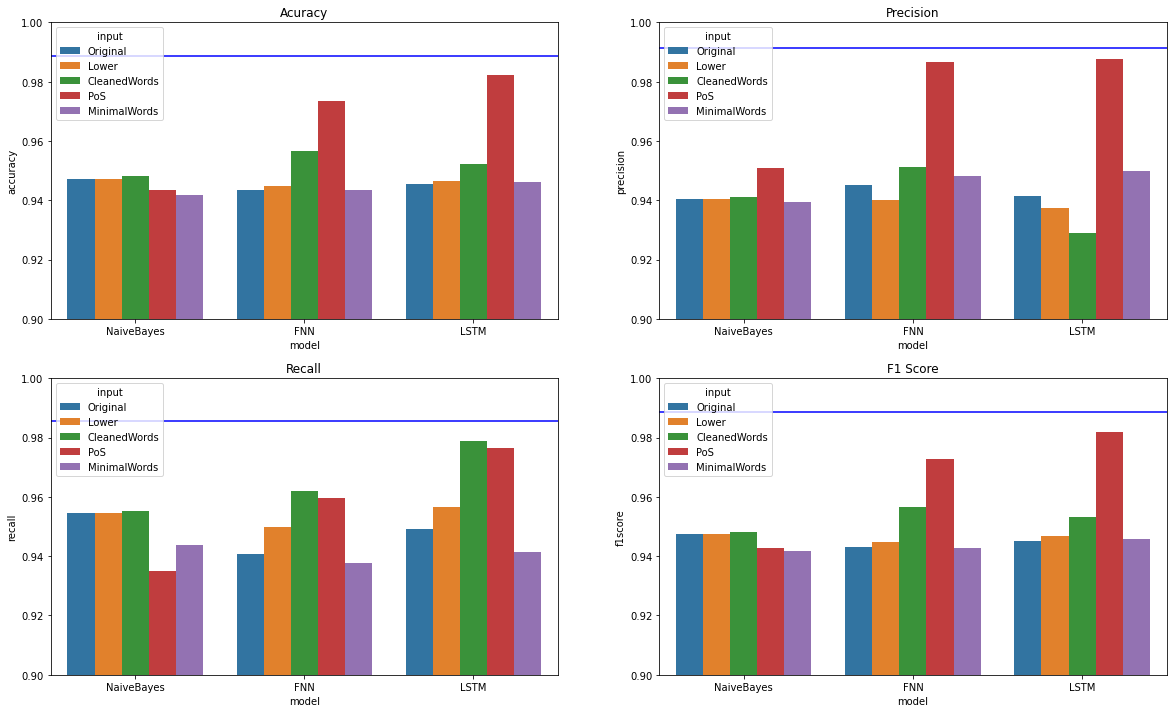

In [13]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])
ax[0, 0].axhline(y=ac, color='b', linestyle='-')

ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])
ax[0, 1].axhline(y=pr, color='b', linestyle='-')

ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])
ax[1, 0].axhline(y=re, color='b', linestyle='-')

ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])
ax[1, 1].axhline(y=f1, color='b', linestyle='-')

plt.show()

# Conclusion

By combining three models with the best performance, the final model achieved 99% accuracy, precision, and recall performances.